# Brautigam and Albert (2000) radial diffusion coeffieints
Reproducing Figures 4 and 5 from the paper

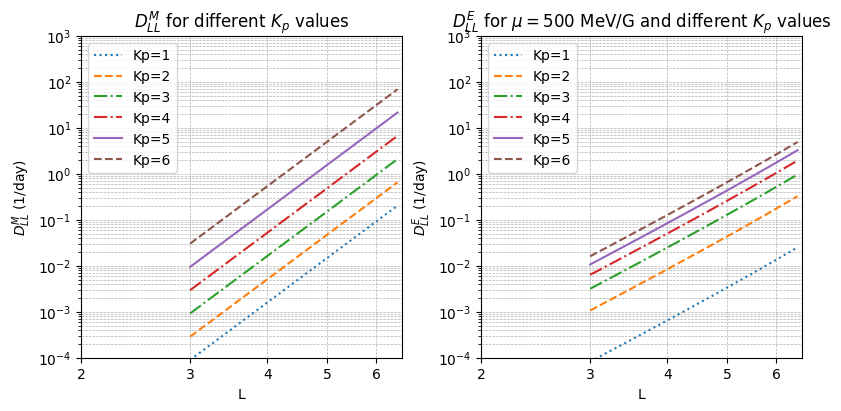

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from rbamlib.models.dll import BA2000  # Ensure this library is available

# Define the range of L and Kp values
L = np.arange(3.0, 6.6, 0.1)
kp_values = [1, 2, 3, 4, 5, 6]
line_styles = ['dotted', 'dashed', 'dashdot', 'dashdot', 'solid', 'dashed']

# Set up the subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)

# Common settings for both plots
for ax in axs:
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(1e-4, 1e3)
    ax.set_xlim(2, 6.6)
    ax.set_xticks([2, 3, 4, 5, 6])  # Set specific tick positions
    ax.set_xticklabels(['2', '3', '4', '5', '6'])  # Set custom tick labels
    ax.set_xlabel('L')
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)

# Titles and labels specific to each subplot
axs[0].set_title(r"$D_{LL}^{M}$ for different $K_p$ values")
axs[0].set_ylabel('$D_{LL}^{M}$ (1/day)')

axs[1].set_title(r"$D_{LL}^{E}$ for $\mu=500$ MeV/G and different $K_p$ values")
axs[1].set_ylabel('$D_{LL}^{E}$ (1/day)')

# Plot data for each Kp value
for i, kp in enumerate(kp_values):
    kp_array = np.full(L.shape, kp)
    mu_array = np.full(L.shape, 500)
    
    # Single call to BA2000 for both dllm and dlle
    dllm, dlle = BA2000(L=L, kp=kp_array, mu=mu_array, dll_type='both')
    
    # Plot results
    axs[0].plot(L, dllm, label=f"Kp={kp}", linestyle=line_styles[i])
    axs[1].plot(L, dlle, label=f"Kp={kp}", linestyle=line_styles[i])

# Add legends
axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')

# Show the combined plot
plt.show()

# Calculation of single values

In [30]:
L = 4.0  # Example L-shell
kp = 2   # Example Kp index

dll_m = BA2000(L, kp)
print(f"DllM at L={L}, Kp={kp}: {dll_m:.4e} 1/day")

DllM at L=4.0, Kp=2: 5.1003e-03 1/day


In [31]:
L = 4.0  # Example L-shell
kp = 2   # Example Kp index
mu = 500  # First adiabatic invariant in MeV/G

dll_e = BA2000(L, kp, mu, 'E')
print(f"DllE at L={L}, Kp={kp}, mu={mu}: {dll_e:.4e} 1/day")

DllE at L=4.0, Kp=2, mu=500: 8.4195e-03 1/day
